In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Importación de datos

In [2]:
df_data = pd.read_csv('../../data/final/data_rows.csv', index_col=0)

# Preparación de datos

In [3]:
df_data = df_data.groupby('Country Name').mean().reset_index().drop('year', axis = 1)

# Calculamos las muertes por cada 100.000 habitantes
df_data['deaths_rate'] = df_data['deaths']/df_data['populantion']*100000

# Calculamos el PIB per cápita
df_data['pib_per_cap'] = df_data['pib']/df_data['populantion']

# tokenizamos la lista de países
country_list = df_data['Country Name'].values.tolist()
df_data['Country Name'] = df_data.index
df_data.columns=['country', 'public_health','deaths', 'population', 'pib', 'deaths_rate', 'pib_per_cap']

In [4]:
df_data.head()

,country,public_health,deaths,population,pib,deaths_rate,pib_per_cap
0,0,0.0,6.150798e+05,3.932711e+07,3.537290e+11,1564.009628,8994.534192
1,1,0.0,2.822529e+06,1.868875e+08,1.371976e+12,1510.282288,7341.184771
2,2,1.0,2.971391e+03,3.660920e+05,1.029916e+10,811.651430,28132.716608
3,3,1.0,5.220874e+05,3.271917e+07,1.210058e+12,1595.662239,36983.153132
4,4,0.0,3.962717e+05,4.289250e+07,2.008953e+11,923.871562,4683.693004


# Implementación del Clustering Jerárquico 
## 1. deaths_rate vs pib_per_cap

### Extracción y normalización de datos

In [5]:
data_to_cluster = df_data.loc[:, ['deaths_rate', 'pib_per_cap']].values

In [6]:
scaler = StandardScaler()
cluster_data = scaler.fit_transform(data_to_cluster)

### Método del silhoutte para elegir la mejor métrica

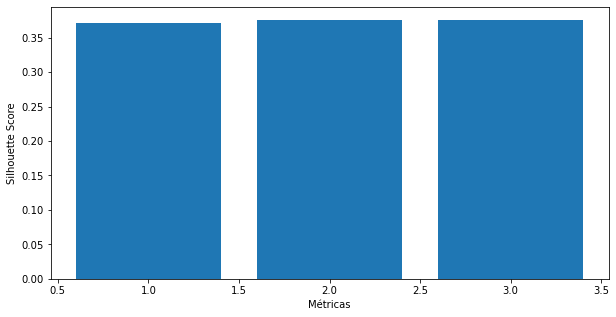

In [7]:
# Array para almacenar las puntuaciones.
silhouette_scores = []
# Metricas que vamos a analizar
metric = ['euclidean','manhattan', 'cosine']
metrics = range(1,len(metric)+1)
i = 0
# Bucle para recoger y añadir al array de las puntuaciones las diferentes puntuaciones obtenidas con las distintas métricas
for a in metrics: 
    score = silhouette_score(cluster_data, AgglomerativeClustering(affinity = metric[i], linkage = 'single').fit_predict(cluster_data)) 
    ss = silhouette_scores.append(score)
    i += 1
    
# plot para comparar resultados
fig = plt.figure(figsize=(10, 5))
plt.bar(metrics, silhouette_scores) 
plt.xlabel('Métricas', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

### Método del silhoutte para obtener la mejor K

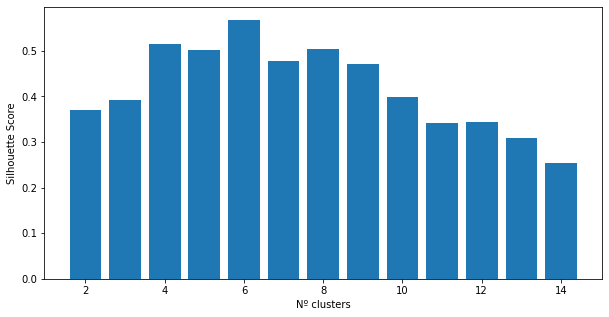

In [8]:
# Array para almacenar las puntuaciones.
silhouette_scores = []
clusters = range(2,15)
# Bucle para probar de 2 a 6 el numero de clusters y ver su puntuación
for n_cluster in clusters:
    score = silhouette_score(cluster_data, AgglomerativeClustering(n_clusters = n_cluster, affinity = 'euclidean',linkage = 'single').fit_predict(cluster_data)) 
    ss = silhouette_scores.append(score)
    
# plot para comparar resultados
fig = plt.figure(figsize=(10, 5))
plt.bar(clusters, silhouette_scores) 
plt.xlabel('Nº clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [9]:
# Calculamos el array de distancias para el dendograma, con la métrica elegida "euclidean"
Z = linkage(cluster_data,'single', metric='euclidean')

### Dendograma 

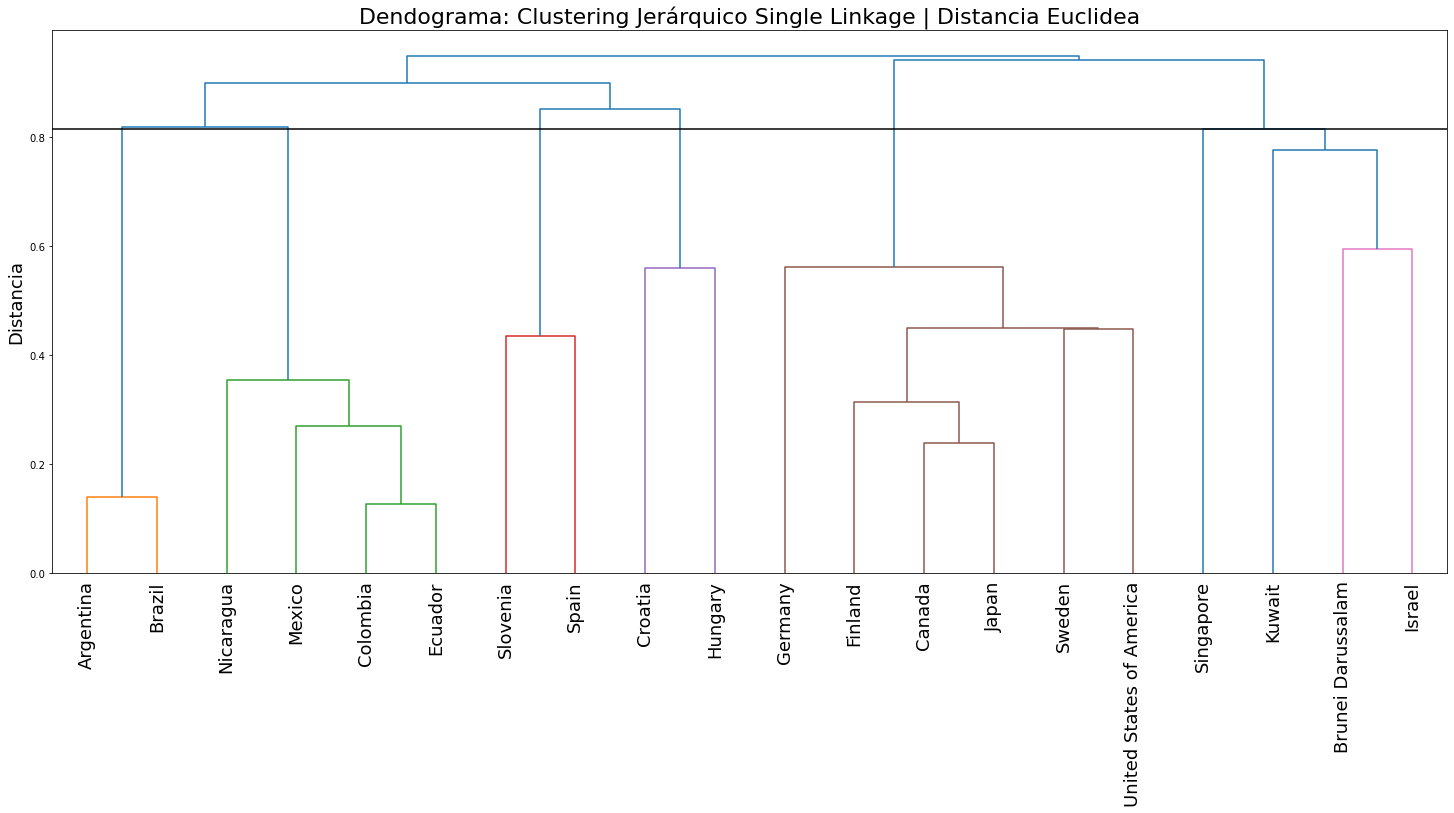

In [10]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z,leaf_font_size= 18,labels=country_list, leaf_rotation = 90)
plt.title("Dendograma: Clustering Jerárquico Single Linkage | Distancia Euclidea", size=22)
plt.ylabel('Distancia',fontsize = 18) 
plt.axhline(y=0.815, c='k')
plt.show()

In [11]:
# Distancia máxima seleccionada anteriormentes
max_d = 0.815
# Array de los clústers de los diferentes paises 
clusters = fcluster(Z, max_d, criterion='distance')

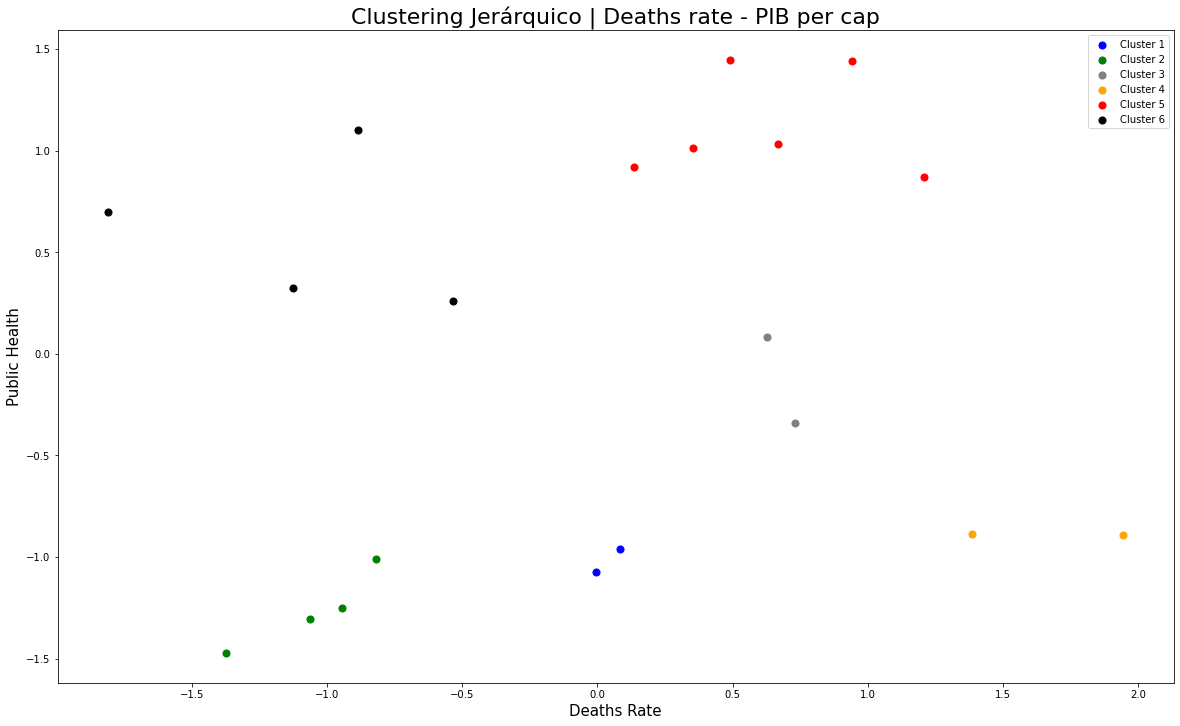

In [12]:
plt.figure(figsize=(20,12))
plt.scatter(cluster_data[clusters == 1, 0], cluster_data[clusters == 1, 1], color = 'blue', label = 'Cluster 1',s=50)
plt.scatter(cluster_data[clusters == 2, 0], cluster_data[clusters == 2, 1], color = 'green', label = 'Cluster 2',s=50)
plt.scatter(cluster_data[clusters == 3, 0], cluster_data[clusters == 3, 1], color = 'grey', label = 'Cluster 3',s=50)
plt.scatter(cluster_data[clusters == 4, 0], cluster_data[clusters == 4, 1], color = 'orange', label = 'Cluster 4',s=50)
plt.scatter(cluster_data[clusters == 5, 0], cluster_data[clusters == 5, 1], color = 'red', label = 'Cluster 5',s=50)
plt.scatter(cluster_data[clusters == 6, 0], cluster_data[clusters == 6, 1], color = 'black', label = 'Cluster 6',s=50)
plt.title("Clustering Jerárquico | Death rate - PIB per cap", size=22)
plt.xlabel('Death Rate',fontsize = 15)
plt.ylabel('Public Health',fontsize = 15)
plt.legend()
plt.show()

In [13]:
df_data['cluster'] = clusters
df_data['country_name'] = country_list

In [14]:
for cluster in range(1,7):
    country_names = df_data[df_data['cluster'] == cluster]['country_name'].values
    
    print('Cluster ' + str(cluster))
    for country in country_names:
        print(' - ' + country)

Cluster 1
 - Argentina
 - Brazil
Cluster 2
 - Colombia
 - Ecuador
 - Mexico
 - Nicaragua
Cluster 3
 - Slovenia
 - Spain
Cluster 4
 - Croatia
 - Hungary
Cluster 5
 - Canada
 - Finland
 - Germany
 - Japan
 - Sweden
 - United States of America
Cluster 6
 - Brunei Darussalam
 - Israel
 - Kuwait
 - Singapore


## 2. deaths_rate vs public_health
### Extracción y normalización de datos

In [15]:
data_to_cluster = df_data.loc[:, ['deaths_rate', 'public_health']].values
cluster_data = scaler.fit_transform(data_to_cluster)

### Método del silhoutte para elegir la mejor métrica

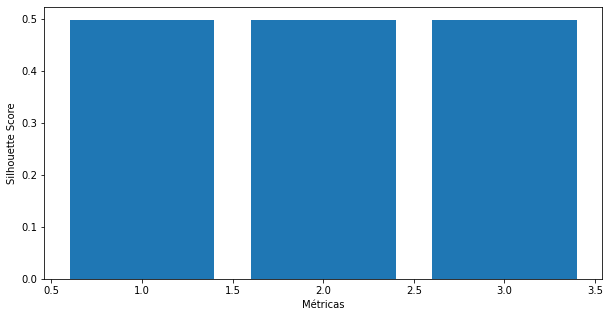

In [16]:
# Array para almacenar las puntuaciones.
silhouette_scores = []
# Metricas que vamos a analizar
metric = ['euclidean','manhattan', 'cosine']
metrics = range(1,len(metric)+1)
i = 0
# Bucle para recoger y añadir al array de las puntuaciones las diferentes puntuaciones obtenidas con las distintas métricas
for a in metrics: 
    score = silhouette_score(cluster_data, AgglomerativeClustering(affinity = metric[i], linkage = 'single').fit_predict(cluster_data)) 
    ss = silhouette_scores.append(score)
    i += 1
    
# plot para comparar resultados
fig = plt.figure(figsize=(10, 5))
plt.bar(metrics, silhouette_scores) 
plt.xlabel('Métricas', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

### Método del silhoutte para obtener la mejor K

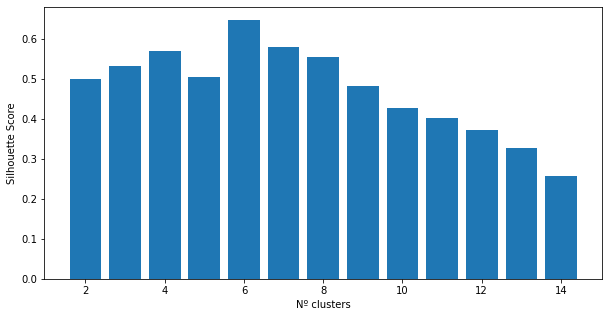

In [17]:
# Array para almacenar las puntuaciones.
silhouette_scores = []
clusters = range(2,15)
# Bucle para probar de 2 a 6 el numero de clusters y ver su puntuación
for n_cluster in clusters:
    score = silhouette_score(cluster_data, AgglomerativeClustering(n_clusters = n_cluster, affinity = 'euclidean',linkage = 'single').fit_predict(cluster_data)) 
    ss = silhouette_scores.append(score)
    
# plot para comparar resultados
fig = plt.figure(figsize=(10, 5))
plt.bar(clusters, silhouette_scores) 
plt.xlabel('Nº clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()  

In [18]:
# Calculamos el array de distancias para el dendograma, con la métrica elegida "euclidean"
Z = linkage(cluster_data,'single', metric='euclidean')

### Dendograma 

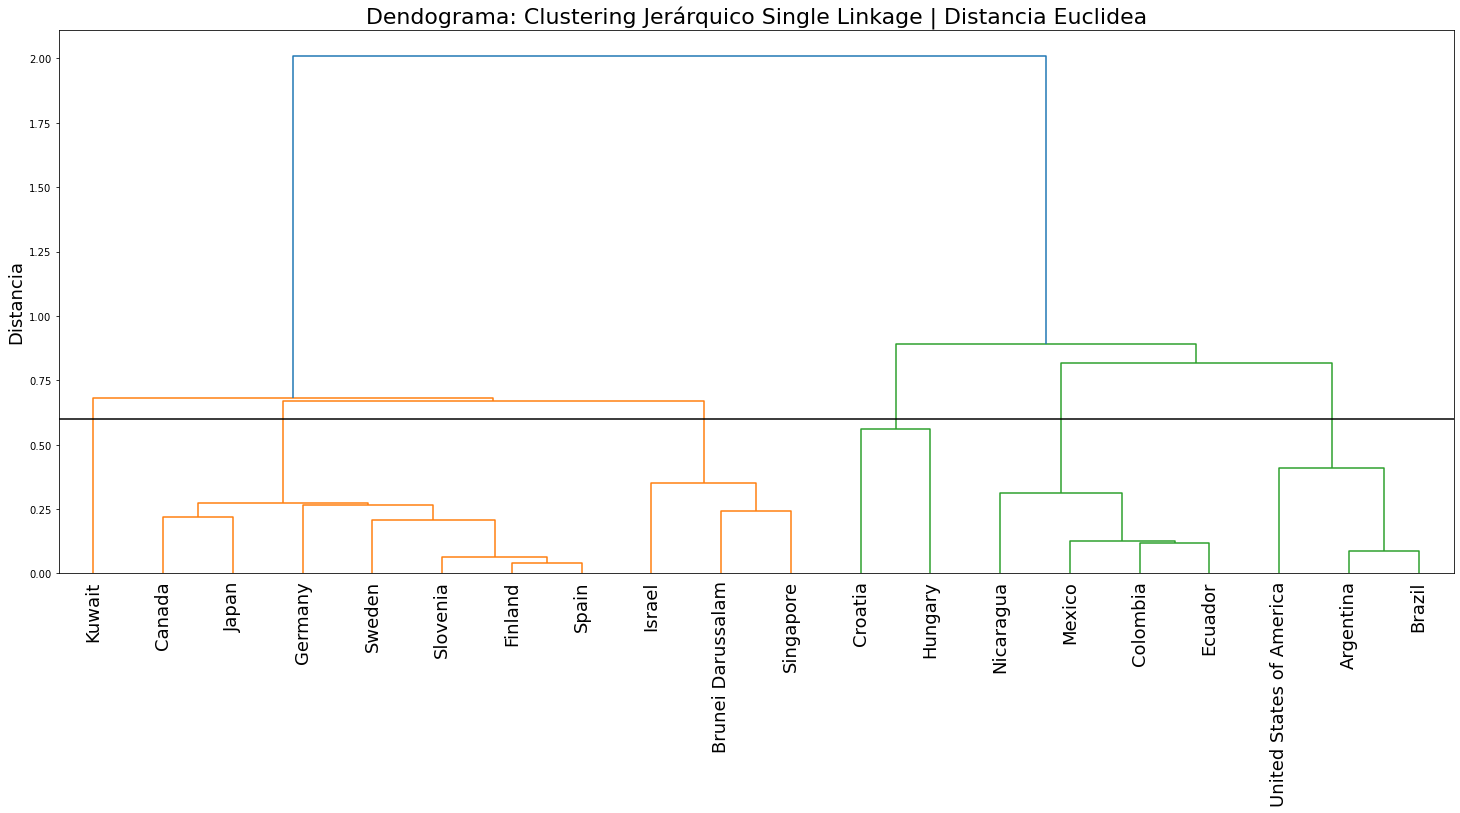

In [19]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z,leaf_font_size= 18,labels=country_list, leaf_rotation = 90)
plt.title("Dendograma: Clustering Jerárquico Single Linkage | Distancia Euclidea", size=22)
plt.ylabel('Distancia',fontsize = 18) 
plt.axhline(y=0.6, c='k')
plt.show()

In [20]:
# Distancia máxima seleccionada anteriormentes
max_d = 0.6
# Array de los clústers de los diferentes paises 
clusters = fcluster(Z, max_d, criterion='distance')

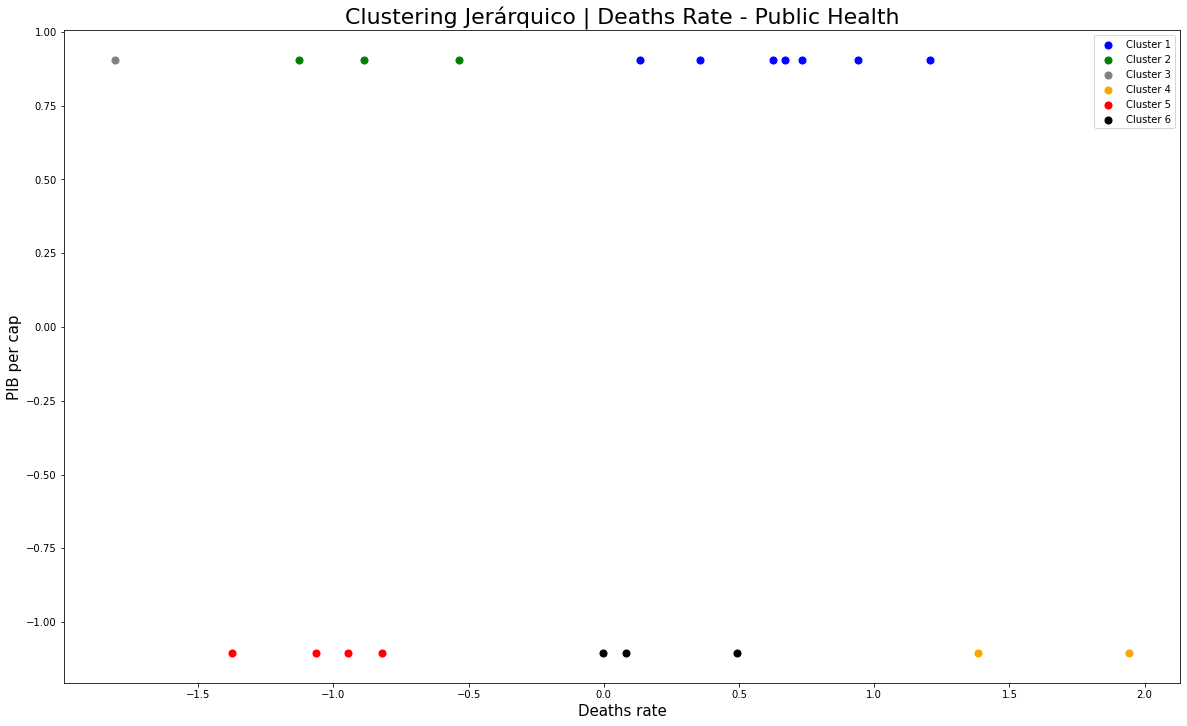

In [21]:
plt.figure(figsize=(20,12))
plt.scatter(cluster_data[clusters == 1, 0], cluster_data[clusters == 1, 1], color = 'blue', label = 'Cluster 1',s=50)
plt.scatter(cluster_data[clusters == 2, 0], cluster_data[clusters == 2, 1], color = 'green', label = 'Cluster 2',s=50)
plt.scatter(cluster_data[clusters == 3, 0], cluster_data[clusters == 3, 1], color = 'grey', label = 'Cluster 3',s=50)
plt.scatter(cluster_data[clusters == 4, 0], cluster_data[clusters == 4, 1], color = 'orange', label = 'Cluster 4',s=50)
plt.scatter(cluster_data[clusters == 5, 0], cluster_data[clusters == 5, 1], color = 'red', label = 'Cluster 5',s=50)
plt.scatter(cluster_data[clusters == 6, 0], cluster_data[clusters == 6, 1], color = 'black', label = 'Cluster 6',s=50)
plt.title("Clustering Jerárquico | Death Rate - Public Health", size=22)
plt.xlabel('Death rate',fontsize = 15)
plt.ylabel('PIB per cap',fontsize = 15)
plt.legend()
plt.show()

In [22]:
df_data['cluster'] = clusters
df_data['country_name'] = country_list

In [23]:
for cluster in range(1,7):
    country_names = df_data[df_data['cluster'] == cluster]['country_name'].values
    
    print('Cluster ' + str(cluster))
    for country in country_names:
        print(' - ' + country)

Cluster 1
 - Canada
 - Finland
 - Germany
 - Japan
 - Slovenia
 - Spain
 - Sweden
Cluster 2
 - Brunei Darussalam
 - Israel
 - Singapore
Cluster 3
 - Kuwait
Cluster 4
 - Croatia
 - Hungary
Cluster 5
 - Colombia
 - Ecuador
 - Mexico
 - Nicaragua
Cluster 6
 - Argentina
 - Brazil
 - United States of America


## 3. deaths_rate vs pib_per_cap vs public_health
### Extracción y normalización de datos

In [24]:
data_to_cluster = df_data.loc[:, ['deaths_rate', 'pib_per_cap', 'public_health']].values
cluster_data = scaler.fit_transform(data_to_cluster)

### Método del silhoutte para elegir la mejor métrica

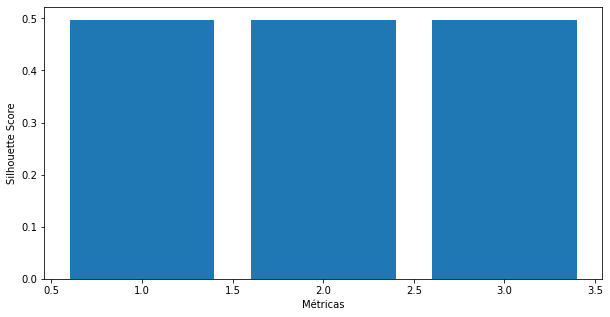

In [25]:
# Array para almacenar las puntuaciones.
silhouette_scores = []
# Metricas que vamos a analizar
metric = ['euclidean','manhattan', 'cosine']
metrics = range(1,len(metric)+1)
i = 0
# Bucle para recoger y añadir al array de las puntuaciones las diferentes puntuaciones obtenidas con las distintas métricas
for a in metrics: 
    score = silhouette_score(cluster_data, AgglomerativeClustering(affinity = metric[i], linkage = 'single').fit_predict(cluster_data)) 
    ss = silhouette_scores.append(score)
    i += 1
    
# plot para comparar resultados
fig = plt.figure(figsize=(10, 5))
plt.bar(metrics, silhouette_scores) 
plt.xlabel('Métricas', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

### Método del silhoutte para obtener la mejor K

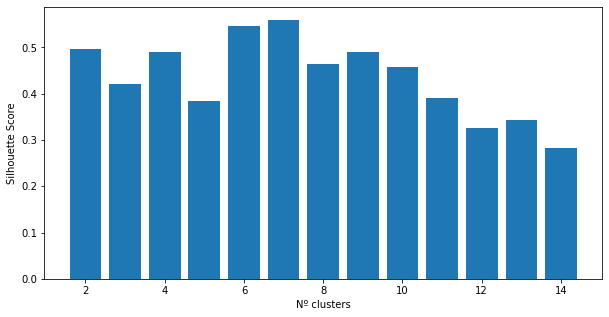

In [26]:
# Array para almacenar las puntuaciones.
silhouette_scores = []
clusters = range(2,15)
# Bucle para probar de 2 a 6 el numero de clusters y ver su puntuación
for n_cluster in clusters:
    score = silhouette_score(cluster_data, AgglomerativeClustering(n_clusters = n_cluster, affinity = 'euclidean',linkage = 'single').fit_predict(cluster_data)) 
    ss = silhouette_scores.append(score)
    
# plot para comparar resultados
fig = plt.figure(figsize=(10, 5))
plt.bar(clusters, silhouette_scores) 
plt.xlabel('Nº clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [27]:
# Calculamos el array de distancias para el dendograma, con la métrica elegida "euclidean"
Z = linkage(cluster_data,'single', metric='euclidean')

### Dendograma 

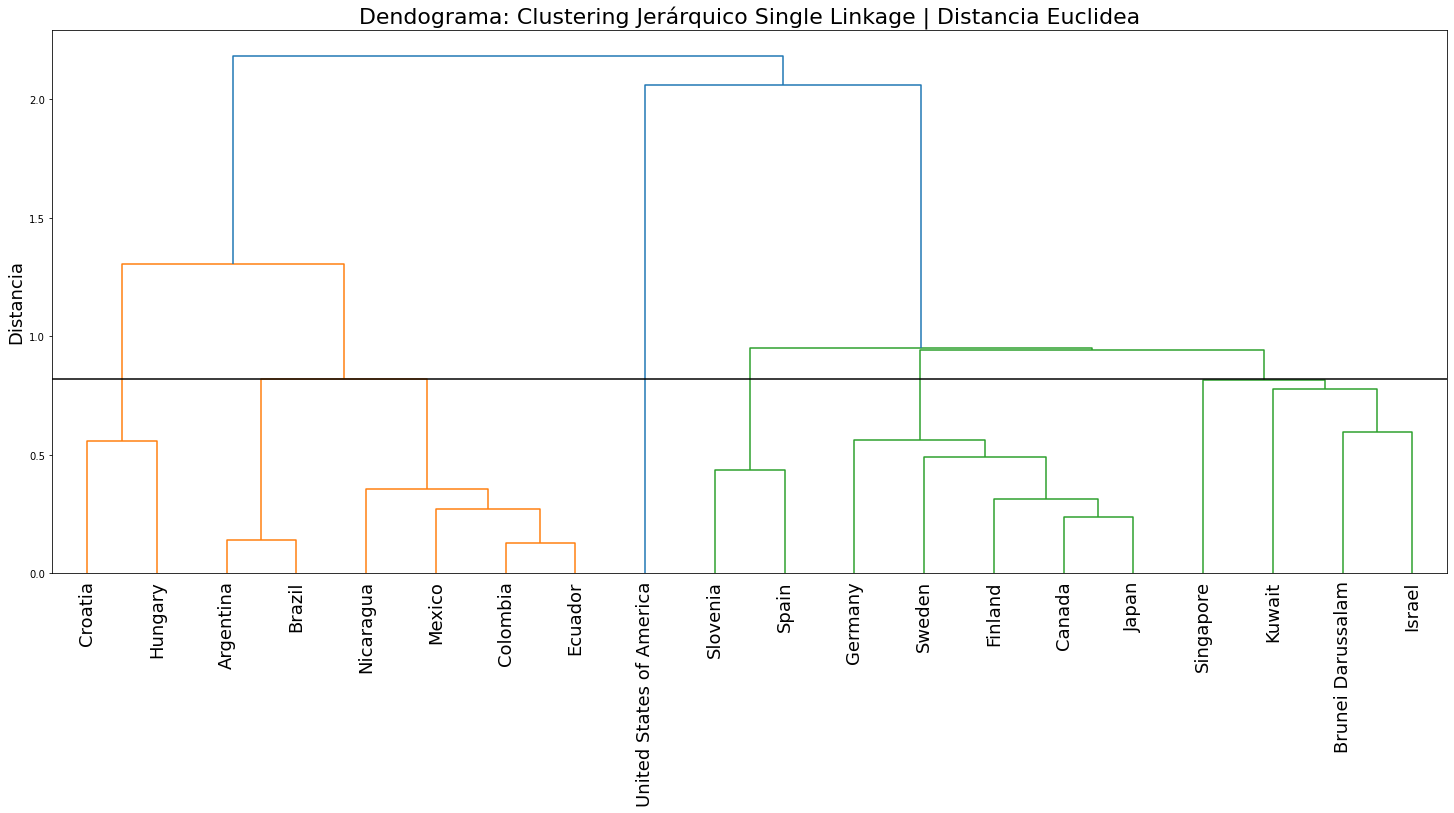

In [28]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z,leaf_font_size= 18,labels=country_list, leaf_rotation = 90)
plt.title("Dendograma: Clustering Jerárquico Single Linkage | Distancia Euclidea", size=22)
plt.ylabel('Distancia',fontsize = 18) 
plt.axhline(y=0.818, c='k')
plt.show()

In [29]:
# Distancia máxima seleccionada anteriormentes
max_d = 0.818
# Array de los clústers de los diferentes paises 
clusters = fcluster(Z, max_d, criterion='distance')

In [30]:
df_data['cluster'] = clusters
df_data['country_name'] = country_list

In [31]:
for cluster in range(1,8):
    country_names = df_data[df_data['cluster'] == cluster]['country_name'].values
    
    print('Cluster ' + str(cluster))
    for country in country_names:
        print(' - ' + country)

Cluster 1
 - Croatia
 - Hungary
Cluster 2
 - Argentina
 - Brazil
Cluster 3
 - Colombia
 - Ecuador
 - Mexico
 - Nicaragua
Cluster 4
 - Slovenia
 - Spain
Cluster 5
 - Canada
 - Finland
 - Germany
 - Japan
 - Sweden
Cluster 6
 - Brunei Darussalam
 - Israel
 - Kuwait
 - Singapore
Cluster 7
 - United States of America
